In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,index,age,race,sex,education,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,y
0,1,26,White,Male,Some-college,a_2,b_4,c_0,d_39,e_4,53833,10,0,0,42,0
1,2,35,White,Male,Some-college,a_2,b_3,c_0,d_39,e_4,67728,10,0,2051,45,0
2,3,61,White,Male,HS-grad,a_2,b_12,c_0,d_39,e_6,268831,9,0,0,53,0
3,4,48,Asian-Pac-Islander,Female,Bachelors,a_5,b_1,c_4,d_30,e_4,238360,13,0,0,40,0
4,5,20,White,Male,Some-college,a_4,b_6,c_3,d_39,e_4,199011,10,0,0,12,0


In [3]:
encoder = OneHotEncoder()
transformed_data = pd.DataFrame(encoder.fit_transform(train_data[['race','sex','education','f1','f2','f3','f4','f5']]).toarray())
new_columns = []
for s in encoder.get_feature_names():
    new_columns.append(s[3:])
transformed_data.columns = new_columns
transformed_data.head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,10th,11th,12th,...,d_9,e_0,e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
train_data = pd.concat([train_data, transformed_data], axis=1)
train_data["y_copy"] = train_data["y"]
train_data = train_data.drop(columns=['index','race','sex','education','f1','f2','f3','f4','f5','y'])
train_data["y"] = train_data["y_copy"]
train_data = train_data.drop(columns=['y_copy'])
train_data.head()

,age,f6,f7,f8,f9,f10,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,...,e_0,e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8,y
0,26,53833,10,0,0,42,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,35,67728,10,0,2051,45,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,61,268831,9,0,0,53,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,48,238360,13,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,20,199011,10,0,0,12,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [5]:
X = train_data.iloc[:,0:107]
X = StandardScaler().fit_transform(X)
y = train_data["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


# Logistic Regression

In [6]:
parameters = {'max_iter':[100, 500, 1000]}
model = GridSearchCV(LogisticRegression(), parameters)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6082
           1       0.73      0.61      0.66      1887

    accuracy                           0.85      7969
   macro avg       0.81      0.77      0.78      7969
weighted avg       0.85      0.85      0.85      7969



In [7]:
accuracy_score(y_test, y_pred)

0.853306562931359

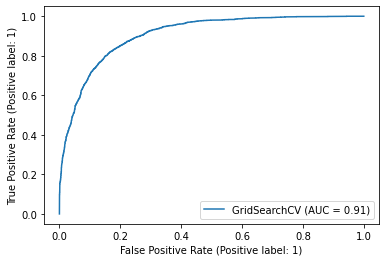

In [8]:
metrics.plot_roc_curve(model, X_test, y_test)

# SVM

In [9]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10]}
svc = svm.SVC()
model =  GridSearchCV(svc, parameters)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6082
           1       0.74      0.58      0.65      1887

    accuracy                           0.85      7969
   macro avg       0.81      0.76      0.78      7969
weighted avg       0.85      0.85      0.85      7969



In [10]:
accuracy_score(y_test, y_pred)

0.8529301041535952

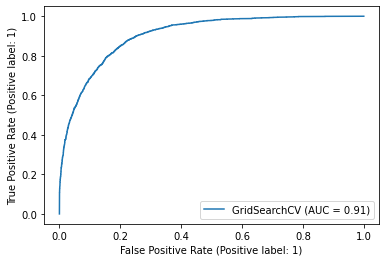

In [11]:
metrics.plot_roc_curve(model, X_test, y_test)

# Adaboost Classifier

In [12]:
model = AdaBoostClassifier(n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6082
           1       0.78      0.65      0.71      1887

    accuracy                           0.87      7969
   macro avg       0.84      0.80      0.81      7969
weighted avg       0.87      0.87      0.87      7969



In [13]:
accuracy_score(y_test, y_pred)

0.87401179570837

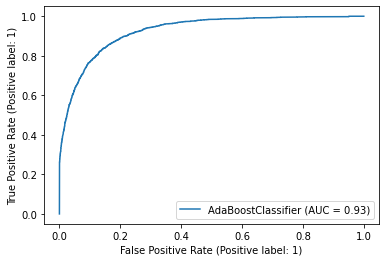

In [14]:
metrics.plot_roc_curve(model, X_test, y_test)

# From the error metrics we can see than out of the 3 models, Adaboost is the most accurate model to use as the AUC score is the highest, accuracy score is the highest and the precision and recall score is the highest

In [15]:
test_data = pd.read_csv("test.csv")

In [16]:
encoder = OneHotEncoder()
transformed_data = pd.DataFrame(encoder.fit_transform(test_data[['race','sex','education','f1','f2','f3','f4','f5']]).toarray())
new_columns = []
for s in encoder.get_feature_names():
    new_columns.append(s[3:])
transformed_data.columns = new_columns
transformed_data.head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,10th,11th,12th,...,d_9,e_0,e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
test_data = pd.concat([test_data, transformed_data], axis=1)
test_data = test_data.drop(columns=['index','race','sex','education','f1','f2','f3','f4','f5'])
test_data.head()

,age,f6,f7,f8,f9,f10,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,...,d_9,e_0,e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8
0,39,366757,9,0,0,35,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,56,275943,10,0,0,40,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17,103810,8,0,0,40,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,58,151910,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,59,161944,13,0,0,38,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
train_data["dummy_col"] = 0
train_data["y_copy"] = train_data["y"]
train_data = train_data.drop(columns=['y'])
train_data["y"] = train_data["y_copy"]
train_data = train_data.drop(columns=['y_copy'])
train_data.head()

,age,f6,f7,f8,f9,f10,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,...,e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8,dummy_col,y
0,26,53833,10,0,0,42,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
1,35,67728,10,0,2051,45,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
2,61,268831,9,0,0,53,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
3,48,238360,13,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
4,20,199011,10,0,0,12,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0


In [19]:
X = train_data.iloc[:,0:108]
X = StandardScaler().fit_transform(X)
y = train_data["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
model = AdaBoostClassifier(n_estimators=100, random_state=123)
model.fit(X_train, y_train)
test_data["y"] = model.predict(test_data)
test_data["y"].value_counts()

0    3034
1    2966
Name: y, dtype: int64

In [20]:
test_data_copy = pd.read_csv("test.csv")
test_data_copy["y"] = test_data["y"]
test_data_copy = test_data_copy.drop(columns=['age','race','sex','education','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10'])
test_data_copy.head()

,index,y
0,1,1
1,2,1
2,3,0
3,4,0
4,5,0


In [21]:
test_data_copy["y"].value_counts()

0    3034
1    2966
Name: y, dtype: int64

In [22]:
test_data_copy.to_csv("testdata.csv", header = True, index = False)